<a href="https://colab.research.google.com/github/ponomarevaJV/PDA_SOL/blob/main/C%D0%9C.%20%E2%84%963%20.%20(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Самостоятельная работа 3. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [3]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [112]:
df2 = df.tail(10)
df2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.diff,capital.diff_group,capital.diff.range,magic_salary
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K,0,-1000 to 0,No Gain/Loss,NaN
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K,0,-1000 to 0,No Gain/Loss,NaN
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0,-1000 to 0,No Gain/Loss,NaN
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,0,-1000 to 0,No Gain/Loss,NaN
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,-1000 to 0,No Gain/Loss,NaN
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,-1000 to 0,No Gain/Loss,NaN
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,-1000 to 0,No Gain/Loss,NaN
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,-1000 to 0,No Gain/Loss,NaN
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,-1000 to 0,No Gain/Loss,NaN
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,15024,> 5000,High Gain,NaN


2) Сколько колонок и сколько строк в этом датасете?

In [5]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [115]:
df.dtypes

age                      int64
workclass               object
fnlwgt                   int64
education               object
education.num            int64
marital.status          object
occupation              object
relationship            object
race                    object
sex                     object
capital.gain             int64
capital.loss             int64
hours.per.week           int64
native.country          object
income                  object
capital.diff             int64
capital.diff_group    category
capital.diff.range      object
magic_salary           float64
dtype: object

4) Какие признаки имеют пропуски?

In [116]:
question_values = (df == ' ?').sum() #сколько значений, содержащих '?' по каждой строке?
question_values

age                      0
workclass             1836
fnlwgt                   0
education                0
education.num            0
marital.status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital.gain             0
capital.loss             0
hours.per.week           0
native.country         583
income                   0
capital.diff             0
capital.diff_group       0
capital.diff.range       0
magic_salary             0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

1. Проблемы технического характера могли привести к потере данных.
2. При вводе данных в таблицу могли вознкнуть ошибки.
3. При сборе информации опрашиваемое население могло сказать неточные, недостоверные сведения, по причине не знания, к примеру места своего рождения.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [40]:
print(df['workclass'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [41]:
df.groupby(['sex']).agg({'age': ['mean']}). reset_index()

,sex,age
,,mean
0,Female,36.858230
1,Male,39.433547


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

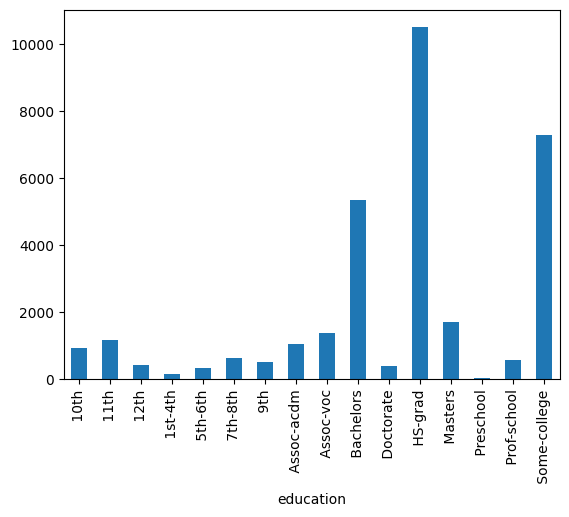

In [42]:
df.groupby('education').count()['education.num'].plot(kind='bar')


9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [39]:
dm = df.groupby('income')[['age']].mean()
ds = df.groupby('income')[['age']].std()
d = pd.concat([dm,ds],axis=1)
d.columns = ['mean','std']
print(d)

             mean        std
income                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [43]:
ds = df[df['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])]
dm = ds[ds['income'] == ' >50K']

if ds.shape[0] == dm.shape[0]:
    print("Да, правда, что люди, получающие >50K, имеют как минимум высшее образование.")
else:
    print("Нет, не все люди, получающие >50K, имеют как минимум высшее образование.")

Да, правда, что люди, получающие >50K, имеют как минимум высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [11]:
male = df[df['sex'] == ' Male']
dn = df[df['marital.status'].str.startswith(' Married')]
ds = df[~df['marital.status'].str.startswith(' Married')]

dg = (dn['income'] == ' >50K').mean()
dm = (ds['income'] == ' >50K').mean()


if dg > dm:
    print("Среди женатых мужчин доля зарабатывающих >50K больше .")
elif dg < dm:
    print("Среди холостых мужчин доля зарабатывающих >50K больше .")
else:
    print("Доли зарабатывающих >50K среди женатых и холостых мужчин равны.")

Среди женатых мужчин доля зарабатывающих >50K больше .


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [13]:
grouped = df.groupby(['native.country', 'income'])['hours.per.week'].mean().unstack()
grouped


income,<=50K,>50K
native.country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [68]:
df['capital.diff'] = df['capital.gain'] - df['capital.loss']

In [69]:
df['capital.diff'] = df['capital.gain'] - df['capital.loss']
def create_range(diff):
    if diff < 0:
        return "Loss"
    elif diff == 0:
        return "No Gain/Loss"
    elif 0 < diff <= 1000:
        return "Low Gain"
    elif 1000 < diff <= 5000:
        return "Medium Gain"
    else:
        return "High Gain"

In [70]:
df['capital.diff.range'] = df['capital.diff'].apply(create_range)

In [72]:
pd.crosstab(df['education'], df['capital.diff.range'])

capital.diff.range,High Gain,Loss,Low Gain,Medium Gain,No Gain/Loss
education,,,,,
10th,10,28,2,28,865
11th,21,33,5,27,1089
12th,8,8,3,11,403
1st-4th,1,4,0,4,159
5th-6th,5,11,0,9,308
7th-8th,8,23,0,33,582
9th,3,9,4,24,474
Assoc-acdm,49,55,0,33,930
Assoc-voc,71,54,2,61,1194


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [84]:
pd.crosstab(df['income'], df['native.country'], values=df['sex'], aggfunc=np.max).T

income,<=50K,>50K
native.country,,
?,Male,Male
Cambodia,Male,Male
Canada,Male,Male
China,Male,Male
Columbia,Male,Male
Cuba,Male,Male
Dominican-Republic,Male,Female
Ecuador,Male,Male
El-Salvador,Male,Male


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [130]:
import numpy as np

In [141]:
def generate_magic_salary(row):
    if row['income'] == '<=50K':
        return np.random.randint(0, 51)
    elif row['income'] == '>50K':
        return np.random.randint(51, 201)
    else:
        return np.nan

df['magic_salary'] = df.apply(generate_magic_salary, axis=1)

In [144]:
mean_salary = df.groupby('education')['magic_salary'].mean()